In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import ttest_ind
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

1.	How would you estimate the impact the weather has on Uber pickups?

            a.	Do certain weather conditions lead to an increase or decrease in pickups?

            b.	Are there any correlations between weather variables and pickups?


pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [3]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("Resources/clean.csv")
df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [4]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])

# Create a new column 'day_of_week' to store the day of the week
df['day_of_week'] = df['pickup_dt'].dt.day_name()

# Display the data 
df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday,day_of_week
0,2015-01-01,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday
1,2015-01-01,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday
2,2015-01-01,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday
3,2015-01-01,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday
4,2015-01-01,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday


In [5]:
clean_df = df[['pickup_dt','month', 'borough', 'pickups', 'Wind speed',
       'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth', 'Holiday', 'day_of_week']]
clean_df = clean_df[clean_df['borough'] == "Manhattan"]
clean_df.describe()

,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth
count,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000
mean,2387.003223,6.000261,8.820094,8.603054,30.650873,1017.813116,0.003821,0.026086,0.091049,2.536200
std,1434.654151,3.706286,2.442952,10.985071,21.242410,7.783349,0.018833,0.092918,0.220433,4.520505
min,0.000000,0.000000,0.000000,-16.666667,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1225.250000,3.000000,9.100000,-0.277778,14.000000,1012.400000,0.000000,0.000000,0.000000,0.000000
50%,2268.500000,6.000000,10.000000,7.222222,30.000000,1018.250000,0.000000,0.000000,0.000000,0.000000
75%,3293.250000,8.000000,10.000000,17.777778,49.000000,1022.925000,0.000000,0.000000,0.051667,3.104167
max,7883.000000,21.000000,10.000000,31.666667,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


The correlation (r-value) between pickups and Wind speed on holidays is 0.08 and r_squared is 0.01
The correlation (r-value) between pickups and Wind speed on regular days is 0.05 and r_squared is 0.0


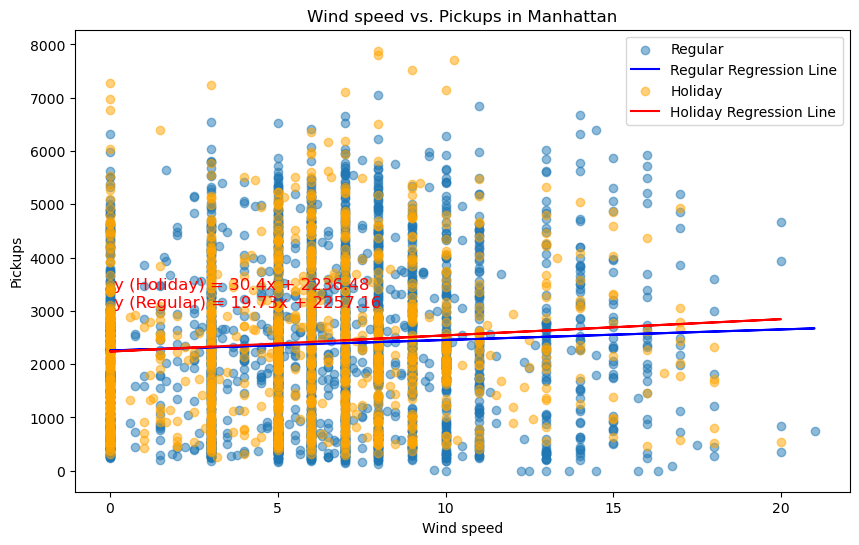

The correlation (r-value) between pickups and Visibility on holidays is -0.05 and r_squared is 0.0
The correlation (r-value) between pickups and Visibility on regular days is -0.03 and r_squared is 0.0


<Figure size 640x480 with 0 Axes>

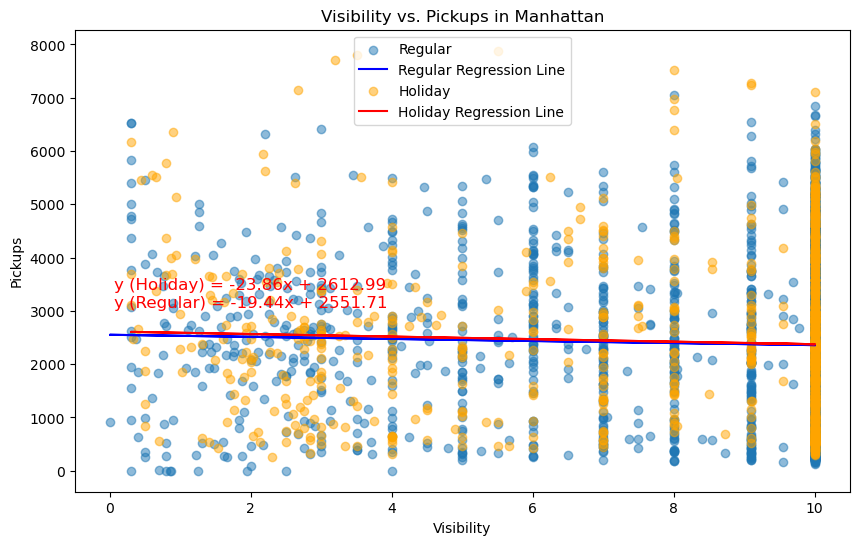

The correlation (r-value) between pickups and Temperature on holidays is 0.16 and r_squared is 0.02
The correlation (r-value) between pickups and Temperature on regular days is 0.16 and r_squared is 0.03


<Figure size 640x480 with 0 Axes>

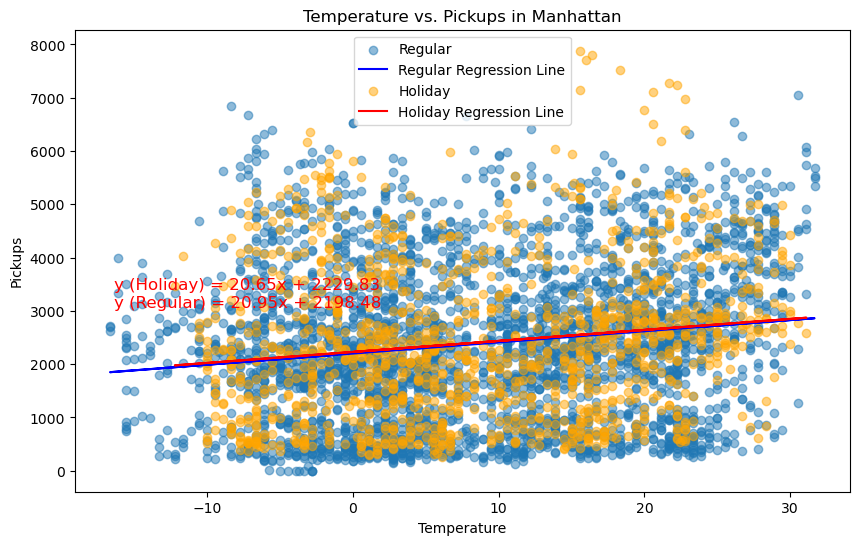

The correlation (r-value) between pickups and dew point on holidays is 0.09 and r_squared is 0.01
The correlation (r-value) between pickups and dew point on regular days is 0.08 and r_squared is 0.01


<Figure size 640x480 with 0 Axes>

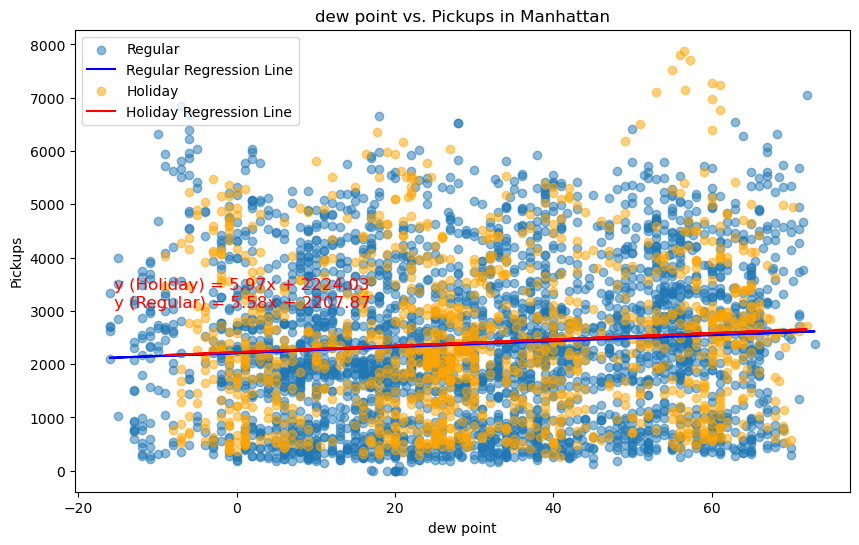

The correlation (r-value) between pickups and Sea level pressure on holidays is -0.07 and r_squared is 0.0
The correlation (r-value) between pickups and Sea level pressure on regular days is -0.04 and r_squared is 0.0


<Figure size 640x480 with 0 Axes>

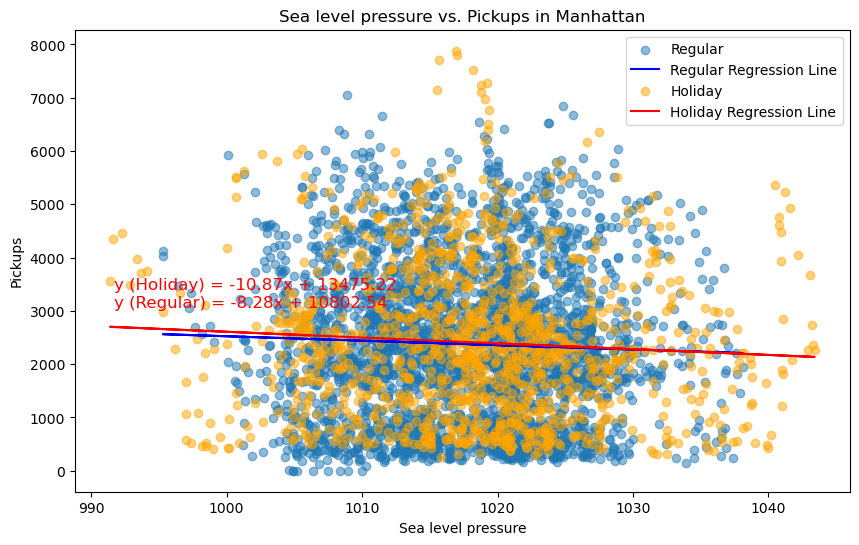

The correlation (r-value) between pickups and Precipitation 01 on holidays is 0.07 and r_squared is 0.0
The correlation (r-value) between pickups and Precipitation 01 on regular days is -0.01 and r_squared is 0.0


<Figure size 640x480 with 0 Axes>

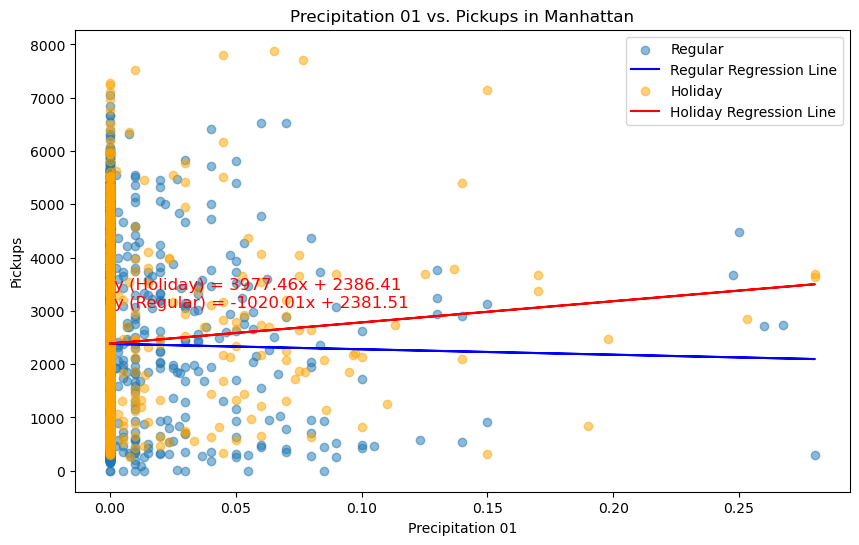

The correlation (r-value) between pickups and Precipitation 06 on holidays is -0.01 and r_squared is 0.0
The correlation (r-value) between pickups and Precipitation 06 on regular days is -0.02 and r_squared is 0.0


<Figure size 640x480 with 0 Axes>

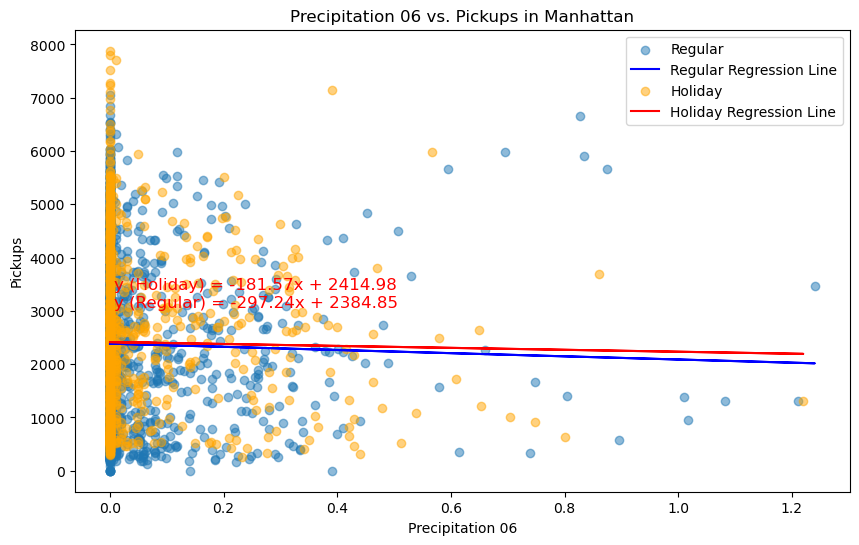

The correlation (r-value) between pickups and Precipitation 24 on holidays is -0.09 and r_squared is 0.01
The correlation (r-value) between pickups and Precipitation 24 on regular days is -0.06 and r_squared is 0.0


<Figure size 640x480 with 0 Axes>

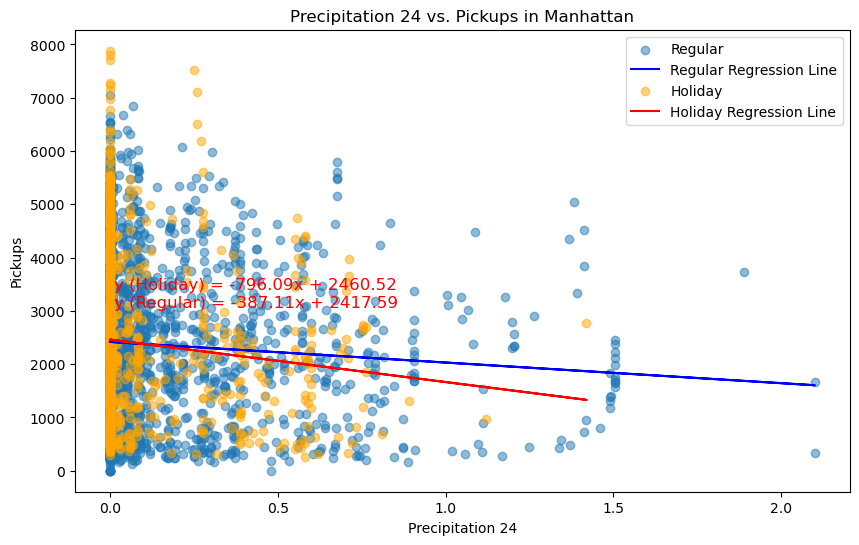

The correlation (r-value) between pickups and Snow depth on holidays is 0.01 and r_squared is 0.0
The correlation (r-value) between pickups and Snow depth on regular days is 0.0 and r_squared is 0.0


<Figure size 640x480 with 0 Axes>

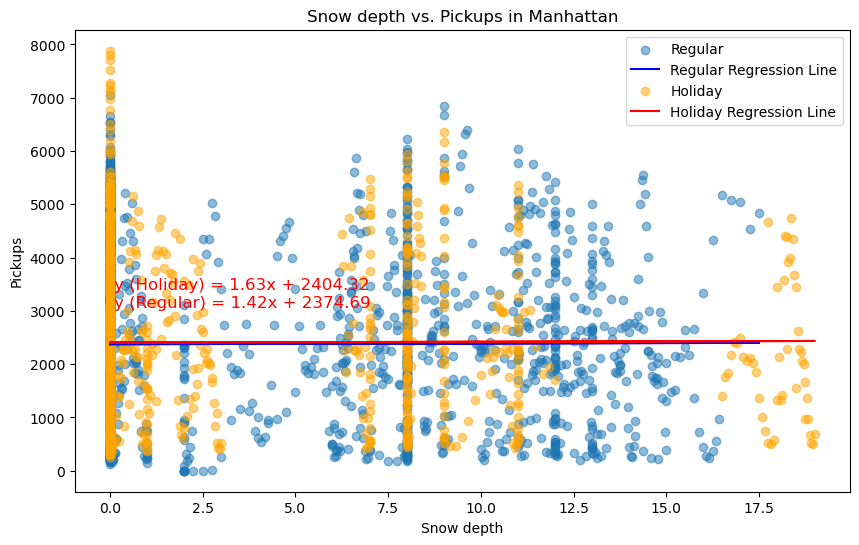

<Figure size 640x480 with 0 Axes>

In [16]:


# Separate data into Holiday and regular days
manhattan_data_holiday = clean_df[clean_df['Holiday'] == 'Y']
manhattan_data_regular = clean_df[clean_df['Holiday'] == 'N']

# List of variables for analysis
variable_list = ['Wind speed', 'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
                 'Precipitation 01', 'Precipitation 06', 'Precipitation 24', 'Snow depth']

# Initialize a counter
counter = 0

# Loop through each weather variable
for variable in variable_list:
    # Extract data for the current variable
    variable_data_holiday = manhattan_data_holiday[variable]
    variable_data_regular = manhattan_data_regular[variable]
    pickups_holiday = manhattan_data_holiday['pickups']
    pickups_regular = manhattan_data_regular['pickups']

    # Calculate the correlation (r-value) between 'pickups' and the current variable
    correlation_holiday = st.pearsonr(variable_data_holiday, pickups_holiday)
    correlation_regular = st.pearsonr(variable_data_regular, pickups_regular)

    # Perform linear regression analysis for holiday data
    slope_holiday, intercept_holiday, rvalue_holiday, pvalue_holiday, stderr_holiday = linregress(variable_data_holiday, pickups_holiday)

    # Perform linear regression analysis for regular data
    slope_regular, intercept_regular, rvalue_regular, pvalue_regular, stderr_regular = linregress(variable_data_regular, pickups_regular)

    # Calculate the values predicted by the linear regression models
    regress_values_holiday = (variable_data_holiday * slope_holiday + intercept_holiday)
    regress_values_regular = (variable_data_regular * slope_regular + intercept_regular)

    # Create a subplot for the current variable
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for regular data
    ax.scatter(variable_data_regular, pickups_regular, label='Regular', alpha=0.5)
    ax.plot(variable_data_regular, regress_values_regular, "b-", label='Regular Regression Line')

    # Scatter plot for holiday data (on top of regular data)
    ax.scatter(variable_data_holiday, pickups_holiday, label='Holiday', alpha=0.5, color='orange')
    ax.plot(variable_data_holiday, regress_values_holiday, "r-", label='Holiday Regression Line')

    # Print the correlation coefficients
    ax.set_xlabel(variable)
    ax.set_ylabel('Pickups')
    ax.set_title(f'{variable} vs. Pickups in Manhattan')
    ax.legend(loc="best")

    # Add annotations for r-value, r-squared value, and regression equations for both regular and holiday data
    line_eq_holiday = f'y (Holiday) = {round(slope_holiday, 2)}x + {round(intercept_holiday, 2)}'
    line_eq_regular = f'y (Regular) = {round(slope_regular, 2)}x + {round(intercept_regular, 2)}'

    annotation_text = f'{line_eq_holiday}\n{line_eq_regular}'

    ax.annotate(annotation_text, (0.05, 0.4), xycoords='axes fraction', fontsize=12, color='red')

    # Calculate the R-squared values for holiday and regular data
    r_squared_holiday = rvalue_holiday ** 2
    r_squared_regular = rvalue_regular ** 2

    print(f"The correlation (r-value) between pickups and {variable} on holidays is {round(correlation_holiday[0], 2)} and r_squared is {round(r_squared_holiday, 2)}")
    print(f"The correlation (r-value) between pickups and {variable} on regular days is {round(correlation_regular[0], 2)} and r_squared is {round(r_squared_regular, 2)}")

    # Save the figure with a unique name for each variable
    fig.savefig(f"Images/Scatter_plot_manhattan_{variable}.png")
    plt.show()
    # Close the figure to release memory
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.close(fig)



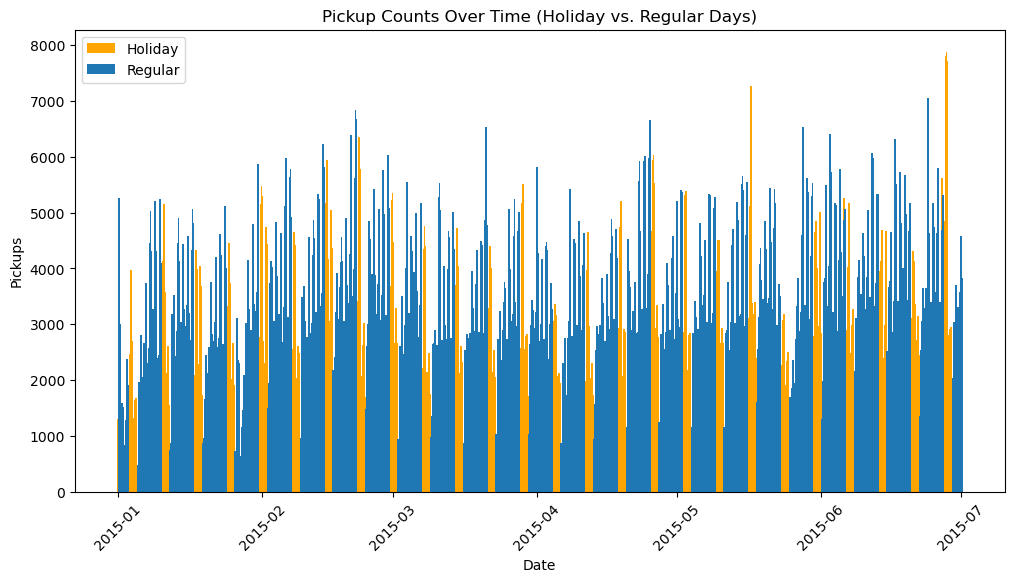

In [7]:
# Separate data into Holiday and regular days
manhattan_data_holiday = clean_df[clean_df['Holiday'] == 'Y']
manhattan_data_regular = clean_df[clean_df['Holiday'] == 'N']

# Group the data by date and calculate the sum of pickups for each day
holiday_daily_pickups = manhattan_data_holiday.groupby('pickup_dt')['pickups'].sum()
regular_daily_pickups = manhattan_data_regular.groupby('pickup_dt')['pickups'].sum()

# Convert the index (date) to datetime format
holiday_daily_pickups.index = pd.to_datetime(holiday_daily_pickups.index)
regular_daily_pickups.index = pd.to_datetime(regular_daily_pickups.index)

# Create a bar plot with different colors for holiday and regular
plt.figure(figsize=(12, 6))
plt.bar(holiday_daily_pickups.index, holiday_daily_pickups, width=0.4, label='Holiday', color='orange',alpha = 1, align='center')
plt.bar(regular_daily_pickups.index, regular_daily_pickups, width=0.4, label='Regular', align='edge')
plt.title('Pickup Counts Over Time (Holiday vs. Regular Days)')
plt.xlabel('Date')
plt.ylabel('Pickups')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [8]:
# Hypothesis testing 
# Example: t-test to compare pickups on holidays vs. non-holidays
holiday_pickups = clean_df [clean_df['Holiday'] == 'Y']['pickups']
non_holiday_pickups = clean_df [clean_df['Holiday'] == 'N']['pickups']

t_stat, p_value = ttest_ind(holiday_pickups, non_holiday_pickups)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 0.6260757820181532, p-value: 0.5312981451834069


In [9]:
clean_df.columns

Index(['pickup_dt', 'month', 'borough', 'pickups', 'Wind speed', 'Visibility',
       'Temperature', 'dew point', 'Sea level pressure', 'Precipitation 01',
       'Precipitation 06', 'Precipitation 24', 'Snow depth', 'Holiday',
       'day_of_week'],
      dtype='object')

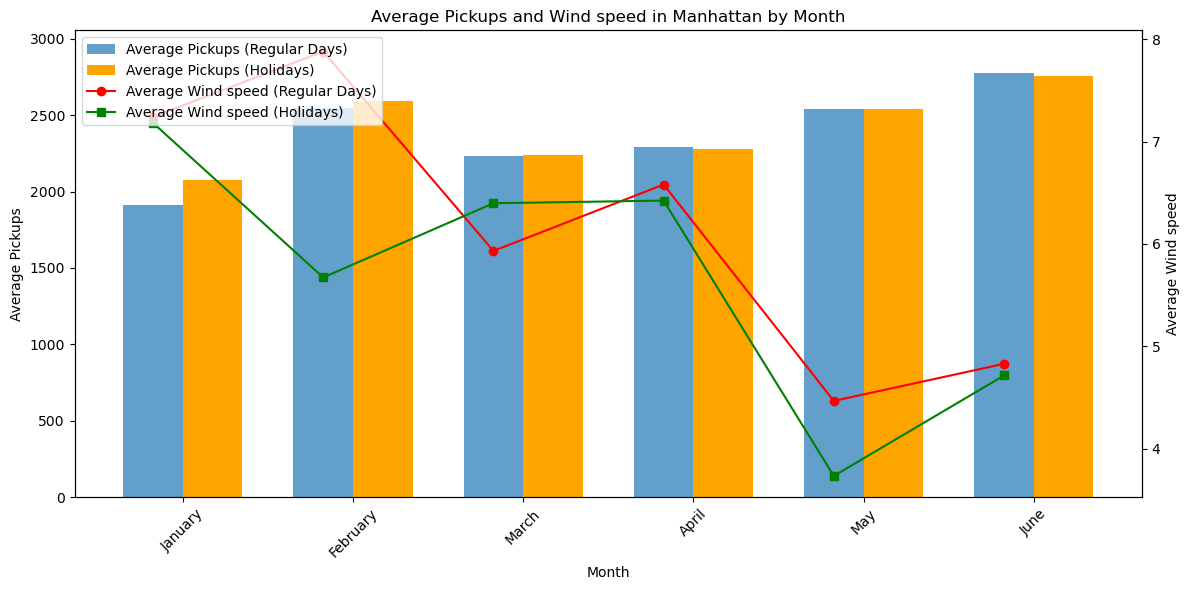

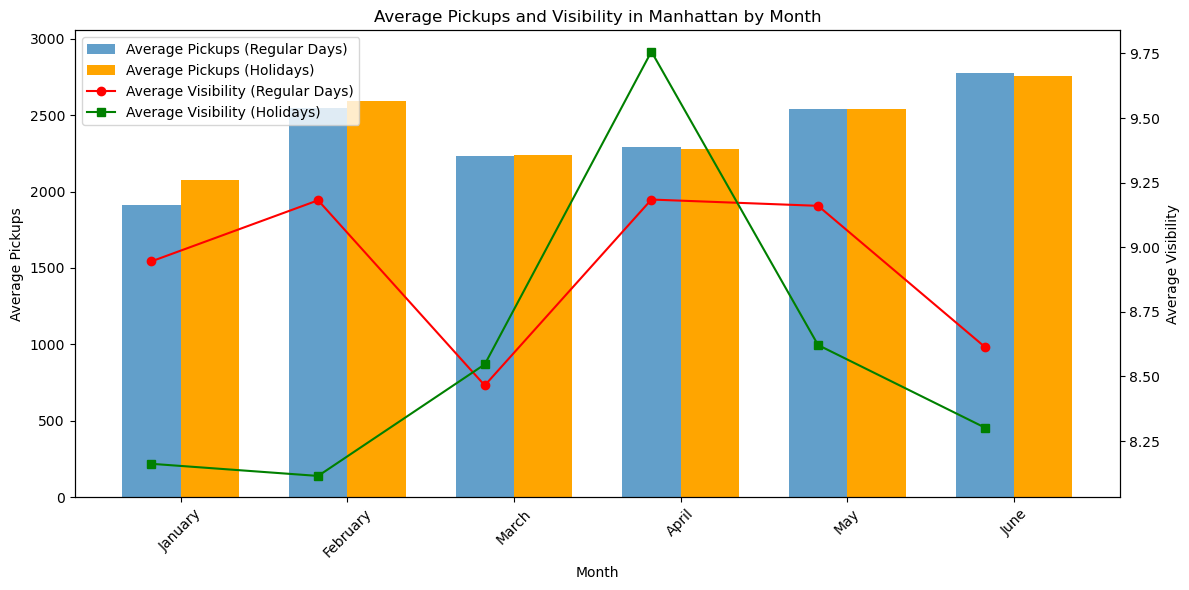

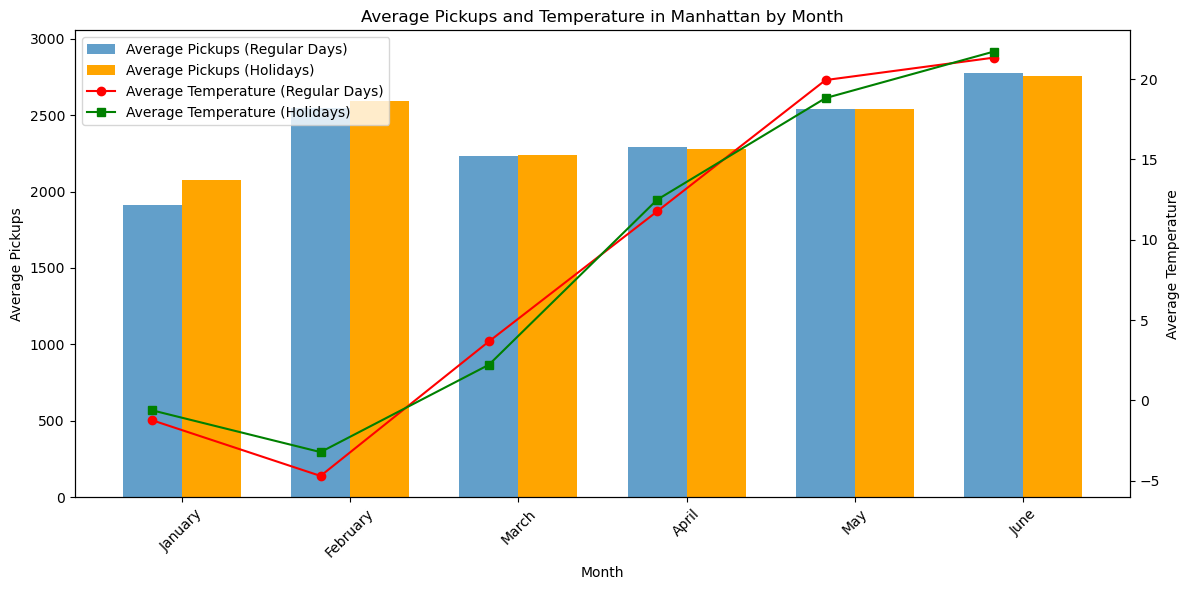

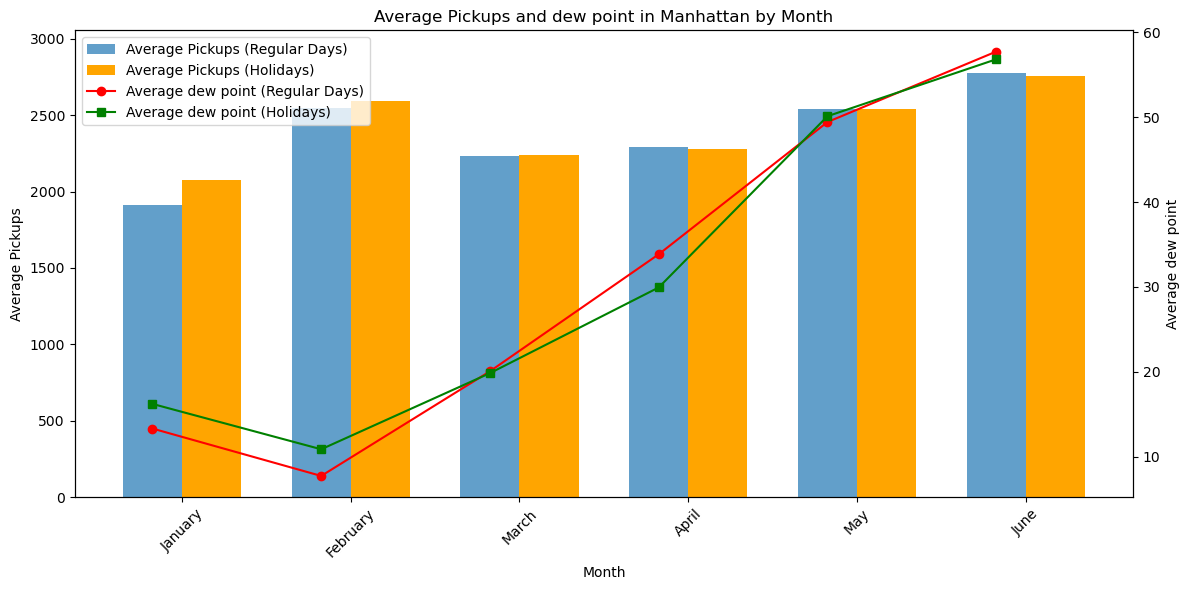

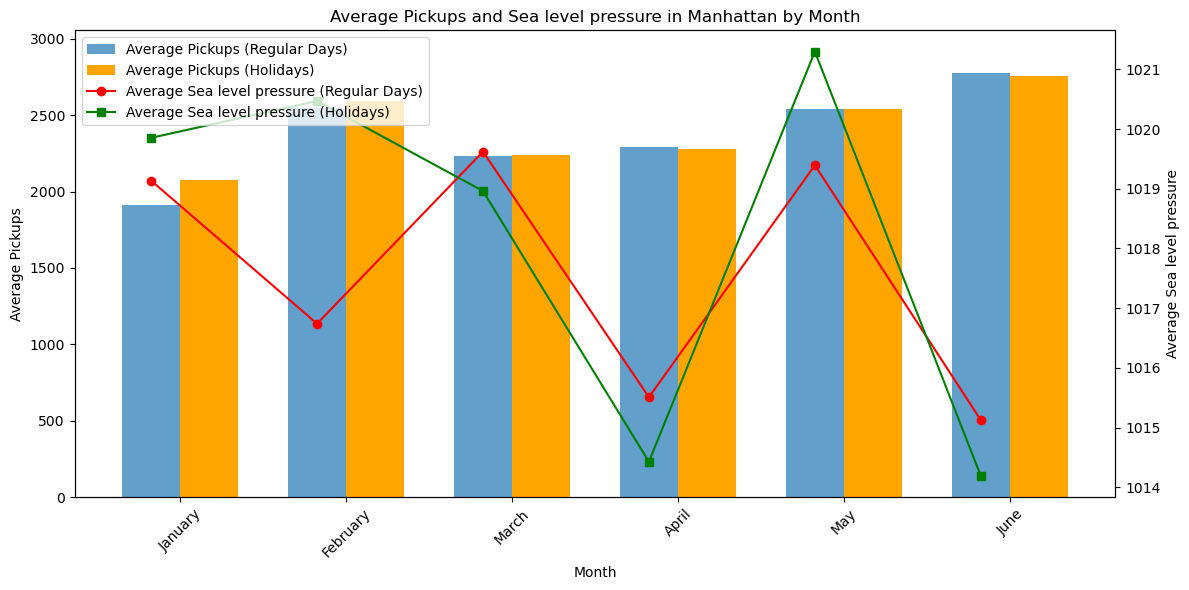

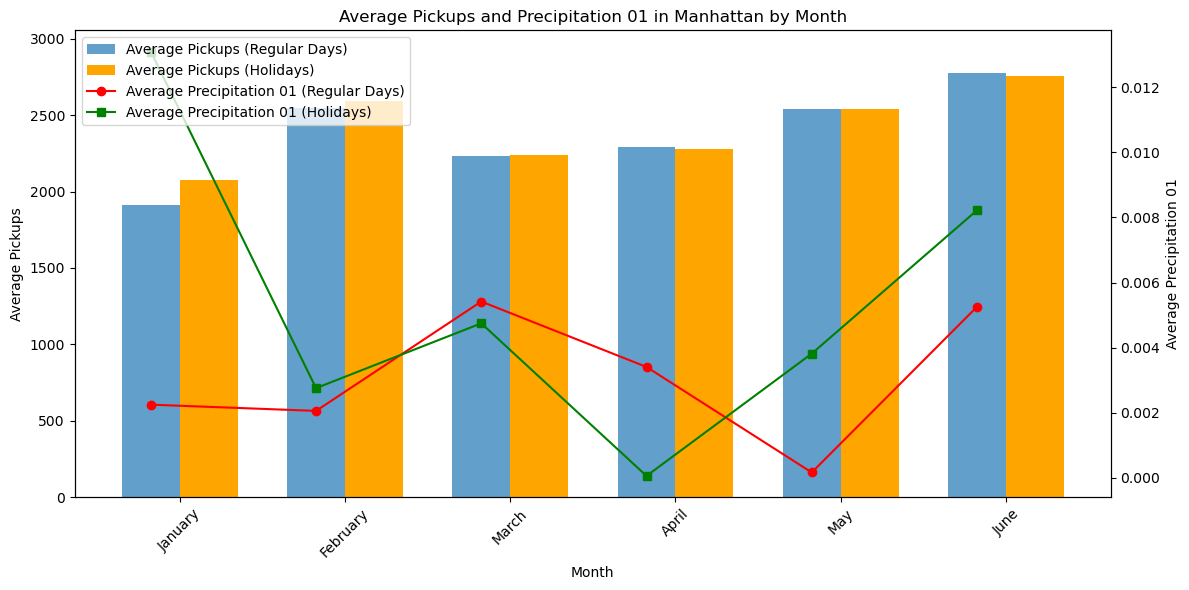

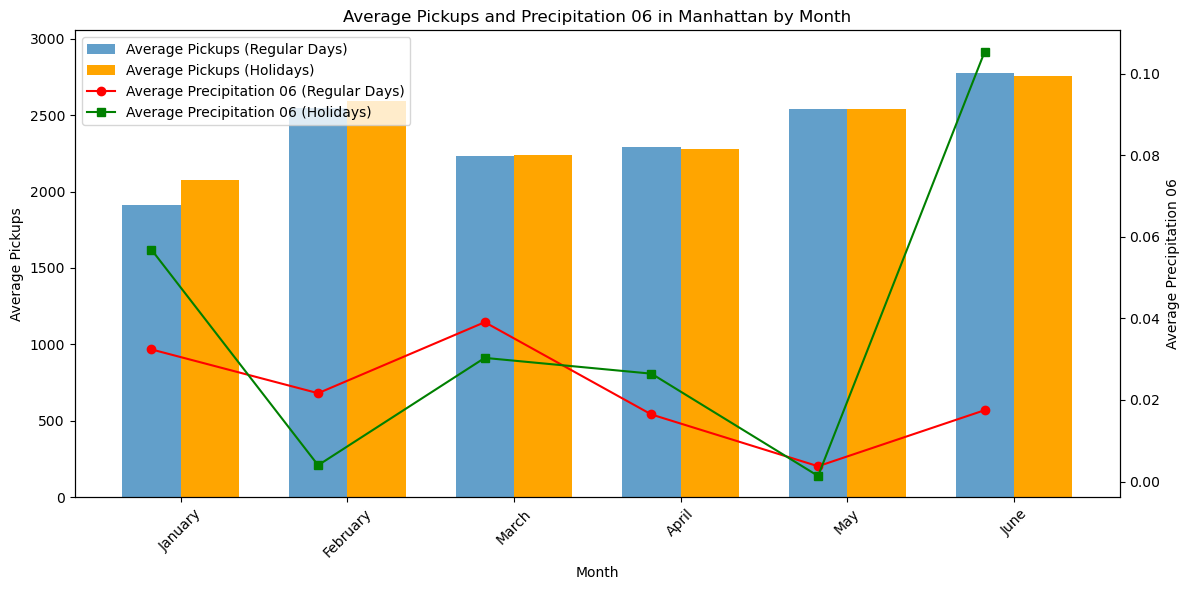

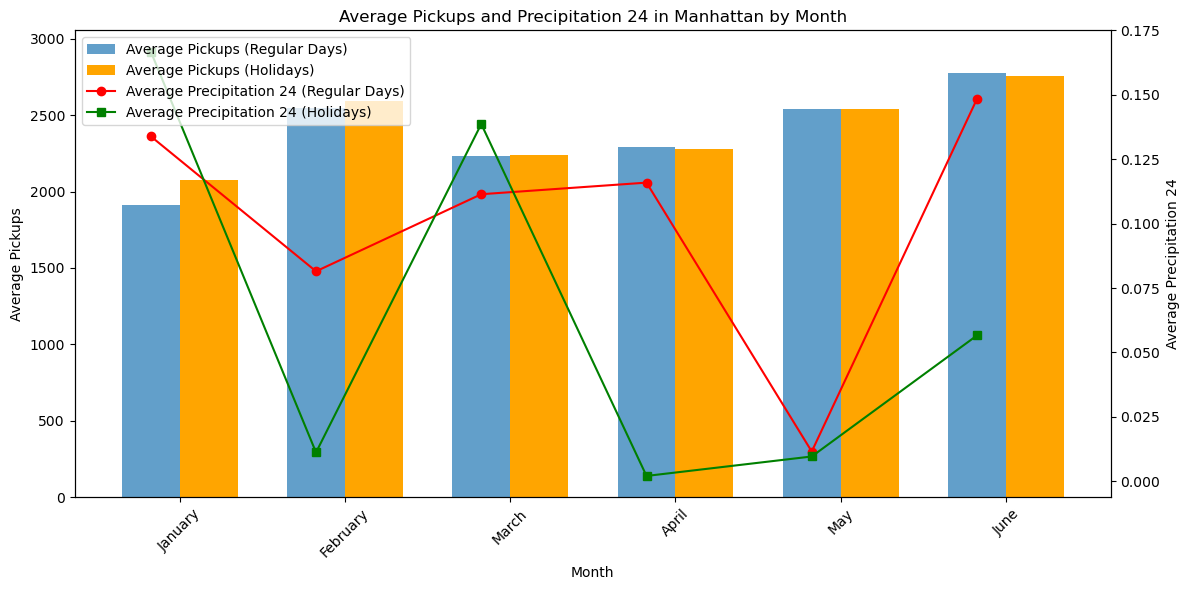

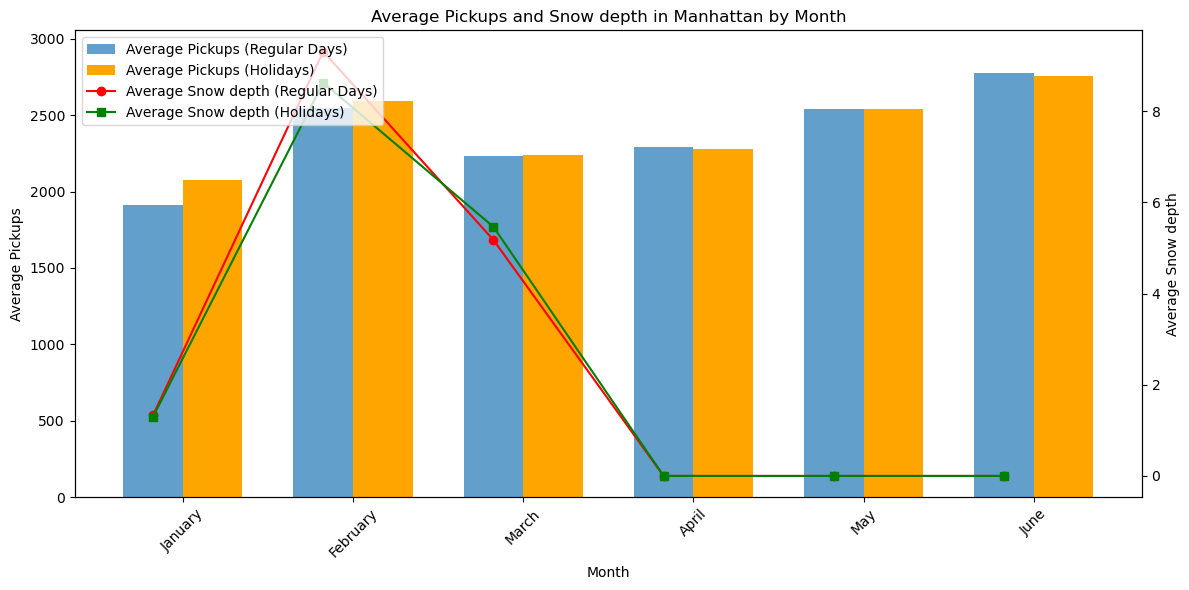

In [10]:
# Filter the data on holidays
manhattan_data_holiday = clean_df[clean_df['Holiday'] == 'Y']

# Filter the data on regular days (non-holidays)
manhattan_data_regular = clean_df[clean_df['Holiday'] == 'N']

# Create a list of unique months for both regular and holiday data
all_months = clean_df['month'].unique()

# List of variables to analyze
variable_list = ['Wind speed', 'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
                  'Precipitation 01', 'Precipitation 06', 'Precipitation 24', 'Snow depth']

# Initialize lists to store the average pickups and variable values for each month for regular and holiday data
average_pickups_holiday = []
average_variable_holiday = {variable: [] for variable in variable_list}
average_pickups_regular = []
average_variable_regular = {variable: [] for variable in variable_list}

# Calculate the average pickups and variable values for each month for regular and holiday data
for month in all_months:
    month_data_regular = manhattan_data_regular[manhattan_data_regular['month'] == month]
    month_data_holiday = manhattan_data_holiday[manhattan_data_holiday['month'] == month]

    average_pickup_regular = month_data_regular['pickups'].mean()
    average_pickup_holiday = month_data_holiday['pickups'].mean()

    average_pickups_regular.append(average_pickup_regular)
    average_pickups_holiday.append(average_pickup_holiday)

    for variable in variable_list:
        average_variable_regular_month = month_data_regular[variable].mean()
        average_variable_holiday_month = month_data_holiday[variable].mean()

        average_variable_regular[variable].append(average_variable_regular_month)
        average_variable_holiday[variable].append(average_variable_holiday_month)

# Create plots for each variable
for variable in variable_list:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Calculate the width of each bar
    bar_width = 0.35
    index = np.arange(len(all_months))

    # Plot regular days data
    ax1.bar(index, average_pickups_regular, width=bar_width, label='Average Pickups (Regular Days)', alpha=0.7)
    ax1.bar(index + bar_width, average_pickups_holiday, width=bar_width, label='Average Pickups (Holidays)', alpha=1, color='orange')

    # Set x-axis labels to be the month names
    ax1.set_xlabel('Month')
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(all_months, rotation=45)

    # Set y-axis label for average pickups
    ax1.set_ylabel('Average Pickups')
    ax1.set_ylim(0, max(max(average_pickups_regular), max(average_pickups_holiday)) * 1.1)  # Set y-axis limit

    # Create a second y-axis for the average variable
    ax2 = ax1.twinx()
    ax2.plot(index, average_variable_regular[variable], color='red', marker='o', label=f'Average {variable} (Regular Days)')
    ax2.plot(index, average_variable_holiday[variable], color='green', marker='s', label=f'Average {variable} (Holidays)')

    # Set y-axis label for the average variable
    ax2.set_ylabel(f'Average {variable}')

    # Add a legend for the temperature
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Set the title
    ax1.set_title(f'Average Pickups and {variable} in Manhattan by Month')
    plt.savefig(f"Images/Pickups_Manhattan_{variable}")
    # Adjust layout
    plt.tight_layout()
    plt.show()


In [11]:
# Calculate correlations
correlations = clean_df[['pickups', 'Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']].corr()
correlations

,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth
pickups,1.000000,0.058340,-0.036224,0.159798,0.084320,-0.049669,0.017372,-0.015723,-0.070201,0.004634
Wind speed,0.058340,1.000000,0.086184,-0.296150,-0.321628,-0.092750,-0.000354,0.016703,-0.010397,0.097022
Visibility,-0.036224,0.086184,1.000000,0.025191,-0.231300,0.167043,-0.488405,-0.118324,0.000902,-0.047841
Temperature,0.159798,-0.296150,0.025191,1.000000,0.896558,-0.224552,-0.013350,-0.037396,-0.014453,-0.545465
dew point,0.084320,-0.321628,-0.231300,0.896558,1.000000,-0.311165,0.115384,0.013191,0.001475,-0.489290
Sea level pressure,-0.049669,-0.092750,0.167043,-0.224552,-0.311165,1.000000,-0.089750,-0.104911,-0.134677,0.121495
Precipitation 01,0.017372,-0.000354,-0.488405,-0.013350,0.115384,-0.089750,1.000000,0.128065,0.001000,0.000307
Precipitation 06,-0.015723,0.016703,-0.118324,-0.037396,0.013191,-0.104911,0.128065,1.000000,0.251190,0.039902
Precipitation 24,-0.070201,-0.010397,0.000902,-0.014453,0.001475,-0.134677,0.001000,0.251190,1.000000,0.069646
Snow depth,0.004634,0.097022,-0.047841,-0.545465,-0.489290,0.121495,0.000307,0.039902,0.069646,1.000000


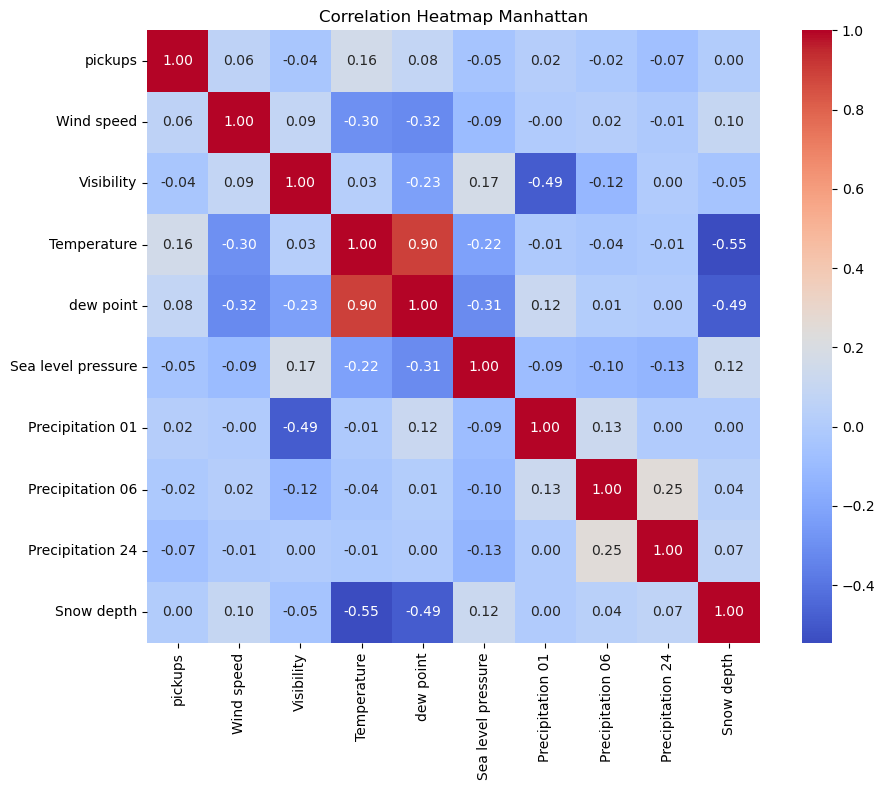

In [12]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap Manhattan")
plt.tight_layout()
plt.savefig(f"Images/Correlation Heatmap - Manhattan")
plt.show()

In [13]:

# Define a list of unique boroughs and months
unique_months = df['month'].unique()

# Define the list of weather variables
variable_list = ['Wind speed', 'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
                 'Precipitation 01', 'Precipitation 06', 'Precipitation 24', 'Snow depth']

# Create an empty DataFrame to store correlations
correlation_df = pd.DataFrame(columns=['Month'] + variable_list)

# Iterate through each combination of borough, month, and weather variable

for month in unique_months:
    row_data = {'Month': month}
    for weather_variable in variable_list:
        # Filter the data for the current borough, month, and weather variable
        subset = clean_df[(clean_df['month'] == month)]
            
        # Calculate the correlation between pickups and the current weather variable
        correlation_matrix = subset[['pickups', weather_variable]].corr()
            
        # Get the correlation coefficient for pickups and the current weather variable
        pickup_weather_corr = correlation_matrix.loc['pickups', weather_variable]
            
        # Store the correlation coefficient in the row_data dictionary
        row_data[weather_variable] = pickup_weather_corr
        
    # Append the row_data to the DataFrame
    correlation_df = correlation_df.append(row_data, ignore_index=True)

# Print the correlation DataFrame
correlation_df


,Month,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth
0,January,0.025734,0.044581,-0.024216,-0.108299,0.061764,0.018582,-0.099297,-0.141625,0.095312
1,February,0.064510,-0.044348,0.046346,-0.116775,-0.008374,0.034154,-0.018923,-0.038181,0.017741
2,March,0.070689,-0.143739,0.107509,0.078595,-0.025117,0.060174,0.010370,-0.047787,-0.021985
3,April,0.205590,0.033422,0.235311,-0.062183,-0.156247,0.018168,0.237717,-0.078416,NaN
4,May,0.152066,0.031451,0.265344,0.008857,-0.110917,0.020163,0.100844,-0.168653,NaN
5,June,0.109073,-0.103745,0.172729,0.001569,0.039512,0.001690,-0.116006,0.033317,NaN


In [14]:
# Define a list of unique boroughs and months
unique_months = clean_df['month'].unique()

# Define the list of weather variables
variable_list = ['Wind speed', 'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
                 'Precipitation 01', 'Precipitation 06', 'Precipitation 24', 'Snow depth']

# Create dictionaries to store the first most positive and most negative correlations
first_most_positive_corr = {}
first_most_negative_corr = {}

# Iterate through each combination of month and weather variable
for month in unique_months:
    # Filter the data for the current borough and month
    subset = clean_df[(clean_df['month'] == month)]

    for weather_variable in variable_list:
        # Calculate the correlation between pickups and the current weather variable
        correlation_matrix = subset[['pickups', weather_variable]].corr()
        
        # Get the correlation coefficient for pickups and the current weather variable
        pickup_weather_corr = correlation_matrix.loc['pickups', weather_variable]

        # Check if the weather variable is already in the dictionaries
        if weather_variable not in first_most_positive_corr:
            first_most_positive_corr[weather_variable] = (month, pickup_weather_corr)
            first_most_negative_corr[weather_variable] = (month, pickup_weather_corr)
        else:
            # Update the dictionaries if a more positive or negative correlation is found
            if pickup_weather_corr > first_most_positive_corr[weather_variable][1]:
                first_most_positive_corr[weather_variable] = (month, pickup_weather_corr)
            if pickup_weather_corr < first_most_negative_corr[weather_variable][1]:
                first_most_negative_corr[weather_variable] = (month, pickup_weather_corr)

# Print the first most positive and most negative correlations for each weather variable
print("First Most Positive Correlations between Pickups and Weather Variable (Manhattan):")
for weather_variable, data in first_most_positive_corr.items():
    print(f"Weather Variable: {weather_variable}, Month: {data[0]}, Correlation: {data[1]}")

print("\nFirst Most Negative Correlations Pickups and Weather Variable (Manhattan):")
for weather_variable, data in first_most_negative_corr.items():
    print(f"Weather Variable: {weather_variable}, Month: {data[0]}, Correlation: {data[1]}")


First Most Positive Correlations between Pickups and Weather Variable (Manhattan):
Weather Variable: Wind speed, Month: April, Correlation: 0.20559049100671592
Weather Variable: Visibility, Month: January, Correlation: 0.04458068444819489
Weather Variable: Temperature, Month: May, Correlation: 0.2653435360521352
Weather Variable: dew point, Month: March, Correlation: 0.07859533942241359
Weather Variable: Sea level pressure, Month: January, Correlation: 0.061764105496050596
Weather Variable: Precipitation 01, Month: March, Correlation: 0.06017365860984711
Weather Variable: Precipitation 06, Month: April, Correlation: 0.2377165647148166
Weather Variable: Precipitation 24, Month: June, Correlation: 0.033316650628215545
Weather Variable: Snow depth, Month: January, Correlation: 0.09531169888839483

First Most Negative Correlations Pickups and Weather Variable (Manhattan):
Weather Variable: Wind speed, Month: January, Correlation: 0.025733551078057897
Weather Variable: Visibility, Month: Ma